## Zadanie 1

In [1]:
bitstring(Float16(1/3))

"0011010101010101"

In [2]:
bitstring(Float32(Float16(1/3)))

"00111110101010101010000000000000"

In [3]:
bitstring(Float64(Float32(Float16(1/3))))

"0011111111010101010101000000000000000000000000000000000000000000"

In [4]:
number = Float16(2.7)
Float64(number)

2.69921875

## Zadanie 2

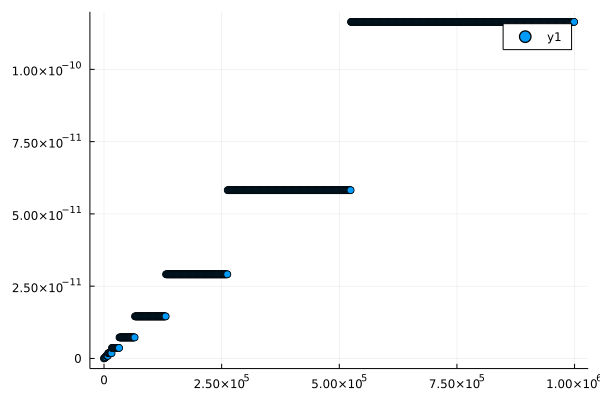

In [2]:
using Plots
scatter(eps,1.0:1000:1000000.0)

## Zadanie 3

```C
#include <stdio.h>
#include <gsl/gsl_ieee_utils.h>
#include <gsl/gsl_math.h>

int main ()
{
  gsl_ieee_env_setup ();
  float a = 1e-33;
  while (a > 0){
    a = a/(2.0);
    gsl_ieee_printf_float(&a);
    printf("\n");
  }
  return 0;
}

// zmienna środowiskowa GSL_IEEE_MODE="round-to-nearest"

1.01001100010011101001100*2^-111
 1.01001100010011101001100*2^-112
 1.01001100010011101001100*2^-113
 1.01001100010011101001100*2^-114
 1.01001100010011101001100*2^-115
 1.01001100010011101001100*2^-116
 1.01001100010011101001100*2^-117
 1.01001100010011101001100*2^-118
 1.01001100010011101001100*2^-119
 1.01001100010011101001100*2^-120
 1.01001100010011101001100*2^-121
 1.01001100010011101001100*2^-122
 1.01001100010011101001100*2^-123
 1.01001100010011101001100*2^-124
 1.01001100010011101001100*2^-125
 1.01001100010011101001100*2^-126
 0.10100110001001110100110*2^-126
 0.01010011000100111010011*2^-126
 0.00101001100010011101010*2^-126
 0.00010100110001001110101*2^-126
 0.00001010011000100111010*2^-126
 0.00000101001100010011101*2^-126
 0.00000010100110001001110*2^-126
 0.00000001010011000100111*2^-126
 0.00000000101001100010100*2^-126
 0.00000000010100110001010*2^-126
 0.00000000001010011000101*2^-126
 0.00000000000101001100010*2^-126
 0.00000000000010100110001*2^-126
 0.00000000000001010011000*2^-126
 0.00000000000000101001100*2^-126
 0.00000000000000010100110*2^-126
 0.00000000000000001010011*2^-126
 0.00000000000000000101010*2^-126
 0.00000000000000000010101*2^-126
 0.00000000000000000001010*2^-126
 0.00000000000000000000101*2^-126
 0.00000000000000000000010*2^-126
 0.00000000000000000000001*2^-126
 0

// można zauważyć, że mantysa denormalizuje się po przekroczeniu zakresu cechy 
// (musimy przesunąć ukrytą jedynkę w prawo) 
```

## Zadanie 4

Jako algorytm niestabilny numerycznie możemy wybrać równanie kwadratowe,
w którym wymuszone będzie odejmowanie bardzo bliskich sobie liczb. Dla przykładu:
x^2 + px + q = 0, gdzie 

In [ ]:
p = Float16(-6.433) 
q = Float16(0.009474)

Policzmy pierwiastki równania tradycyjnie, używając delty

In [12]:
delta = sqrt(p^2 - 4*q)

Float16(6.434)

In [13]:
x1 = (-p-delta)/2

Float16(0.0)

In [14]:
x2 = (-p+delta)/2

Float16(6.434)

Widać wyraźnie błąd przy wyliczaniu pierwiastka x1. Pomimo, że wzór na deltę wprost stwierdza o nierówności względem -p, to po odjęciu dostajemy 0. Prześledźmy zapis binarny obu liczb :

In [17]:
bitstring(-p)

"0100011001101111"

In [16]:
bitstring(delta)

"0100011001101111"

Wystąpił tu błąd rodzaju cancellation: za mała dokładność reprezentacji liczb (brak kolejnych miejsc mantysy) spowodowała wyzerowanie się pierwiastka. Widzimy jednak, że drugi z pierwiastków ze względu na dodawanie nie jest obarczony tym błędem. Wykorzystajmy zatem wzór Viet'a do wyliczenia pierwiastka obarczonego błędem:

In [18]:
x1 = q/2

Float16(0.004738)

Wynik zdecydowanie bardziej przemawia do wyobraźni i pokrywa się z wyliczeniami ręcznymi.
Oczywiście jest to trywialny przykład numerycznej niestabilności, która wynika tu wyłącznie z góry narzuconej dokładności.